# 1.Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaudio
# pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

You should consider upgrading via the 'c:\users\dellr\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

You should consider upgrading via the 'c:\users\dellr\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load MOdel

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\dellr/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-3-19 Python-3.9.0 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections

In [7]:
img = "https://i.pinimg.com/564x/27/17/f1/2717f1387a9b8c7c34a6dc06249104b3.jpg"

In [8]:
results = model(img)
results.print()

image 1/1: 845x564 4 persons, 1 sports ball
Speed: 860.9ms pre-process, 549.4ms inference, 17.0ms NMS per image at shape (1, 3, 640, 448)


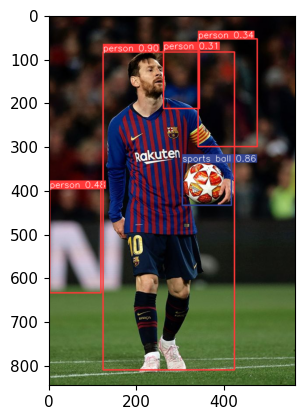

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.xyxy

[tensor([[1.23265e+02, 8.43997e+01, 4.23514e+02, 8.10263e+02, 8.96943e-01, 0.00000e+00],
         [3.04122e+02, 3.36294e+02, 4.16249e+02, 4.34820e+02, 8.62066e-01, 3.20000e+01],
         [1.45634e+00, 3.96147e+02, 1.18474e+02, 6.34149e+02, 4.76014e-01, 0.00000e+00],
         [3.40296e+02, 5.47788e+01, 4.75212e+02, 3.00183e+02, 3.36416e-01, 0.00000e+00],
         [2.61691e+02, 7.94013e+01, 3.43761e+02, 2.13223e+02, 3.11117e-01, 0.00000e+00]])]

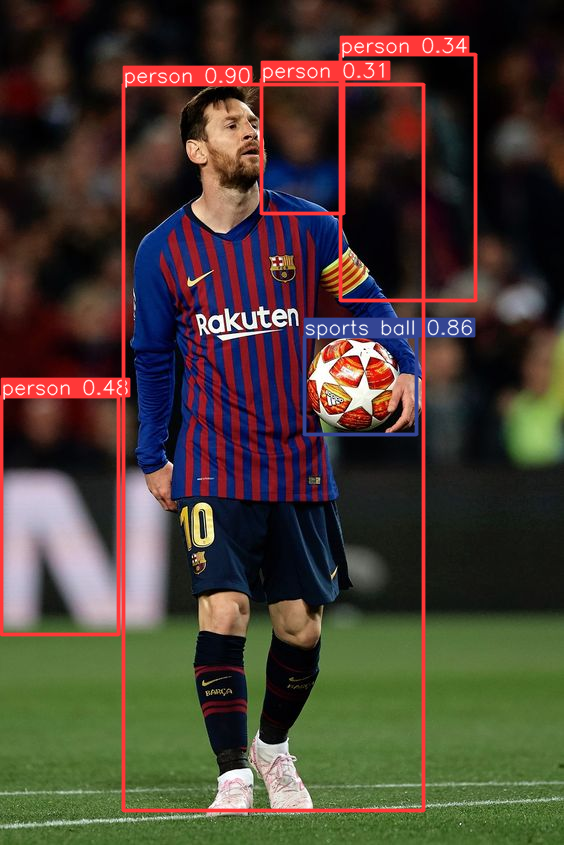

In [11]:
results.show()

In [12]:
results.render()

[array([[[ 13,   9,   8],
         [ 14,  10,   9],
         [ 16,  12,  11],
         ...,
         [  7,   6,   2],
         [  6,   5,   1],
         [  6,   5,   1]],
 
        [[ 13,   9,   8],
         [ 14,  10,   9],
         [ 16,  12,  11],
         ...,
         [  7,   6,   2],
         [  6,   5,   1],
         [  5,   4,   0]],
 
        [[ 12,   8,   7],
         [ 14,  10,   9],
         [ 16,  12,  11],
         ...,
         [  7,   6,   2],
         [  6,   5,   1],
         [  5,   4,   0]],
 
        ...,
 
        [[ 80, 110,  50],
         [ 82, 112,  52],
         [ 78, 109,  49],
         ...,
         [ 55,  89,  29],
         [ 57,  91,  31],
         [ 59,  93,  33]],
 
        [[ 78, 108,  48],
         [ 81, 111,  51],
         [ 78, 109,  49],
         ...,
         [ 61,  95,  35],
         [ 62,  96,  36],
         [ 64,  98,  38]],
 
        [[ 79, 109,  47],
         [ 83, 113,  51],
         [ 80, 112,  49],
         ...,
         [ 65,  99,  39],
  

In [13]:
np.array(results.render()).shape

(1, 845, 564, 3)

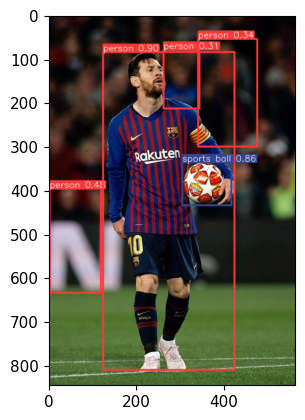

In [14]:
plt.imshow(np.squeeze(results.render()))

# 4. Real Time Detections

In [15]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    # make detectons
    results = model(frame)

    cv2.imshow('Yolo', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train Form Scratch

In [16]:
import uuid # unique identifier
import os
import time

In [20]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['hello', 'name', 'no', 'yes', 'good', 'nice', 'meet', 'iloveyou', 'you']
number_imgs = 11

In [21]:
cap = cv2.VideoCapture(0)

# loop through labels
for label in labels:
    print('collecting images for {}'.format(label))
    time.sleep(5)

    # loop through image range
    for img_num in range(number_imgs):
        print('collecting images for {}, image number {}'.format(label, img_num))
        
        # web cam feed
        ret, frame = cap.read()

        # naming out image path
        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')
        
        # writes our image to file
        cv2.imwrite(imgname, frame)

        # render to the screen
        cv2.imshow('Image Collection', frame)

        # 2 second delay between captures 
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

collecting images for hello
collecting images for hello, image number 0
collecting images for hello, image number 1
collecting images for hello, image number 2
collecting images for hello, image number 3
collecting images for hello, image number 4
collecting images for hello, image number 5
collecting images for hello, image number 6
collecting images for hello, image number 7
collecting images for hello, image number 8
collecting images for hello, image number 9
collecting images for hello, image number 10
collecting images for hello, image number 11
collecting images for hello, image number 12
collecting images for hello, image number 13
collecting images for hello, image number 14
collecting images for hello, image number 15
collecting images for hello, image number 16
collecting images for hello, image number 17
collecting images for hello, image number 18
collecting images for hello, image number 19
collecting images for name
collecting images for name, image number 0
collecting i

In [22]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [32]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Using cached PyQt5-5.15.9-cp37-abi3-win_amd64.whl (6.8 MB)
     -------------------------------------- 78.4/78.4 kB 619.3 kB/s eta 0:00:00
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\pylupdate5.exe' -> 'C:\\Python311\\Scripts\\pylupdate5.exe.deleteme'


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


In [33]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 150 --data dataset.yaml --weights yolov5s.pt 

requirements: E:\sign_Language_detection_using_yolo\requirements.txt not found, check failed.


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-158-g6f3261c Python-3.9.0 torch-2.0.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, 

In [ ]:
#--workers 2

# 6. Load Model

In [43]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [44]:
import uuid # unique identifier
import os
import time

In [45]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5/runs/train/exp16/weights/last.pt') # force relaod =True

Using cache found in C:\Users\dellr/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-3-19 Python-3.9.0 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7069459 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [46]:
img = os.path.join('data', 'images', 'meet.62f93106-c638-11ed-bfed-6018955922fa.jpg')

In [47]:
results = model(img)

In [48]:
results.print()

image 1/1: 480x640 1 meet
Speed: 11.6ms pre-process, 386.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


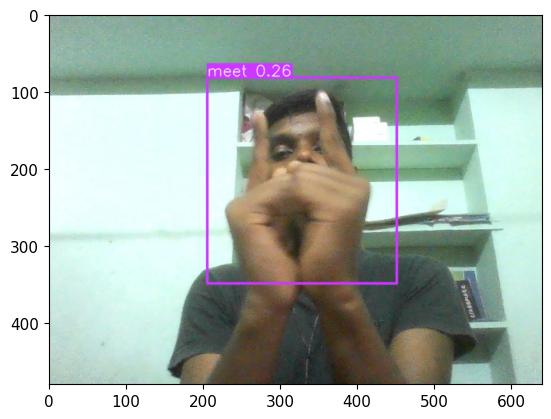

In [49]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [42]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('Detector', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()